Kindly upload **netsience.csv** and **authors.csv** file before running this notebook. 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd  

1. Load your dataset using NetworkX and construct a graph(G1).

In [2]:
nodesDf = pd.read_csv('authors.csv')
nodesDf

,AuthorID,AuthorName
0,1,"Kuperman, M"
1,2,"Acebron, J"
2,3,"Bonilla, L"
3,4,"Perezvicente, C"
4,5,"Ritort, F"
...,...,...
1584,1585,"Zhu, H"
1585,1586,"Huang, Z"
1586,1587,"Zhu, J"
1587,1588,"Zimmermann, M"


In [3]:
edgesDf = pd.read_csv('netsience.csv')
edgesDf

,Author1 ID,Author1 Name,Author2 ID,Author2 Name,Weight
0,1,"Kuperman, M",1589,"Abramson, G",2.50
1,3,"Bonilla, L",2,"Acebron, J",0.25
2,4,"Perezvicente, C",2,"Acebron, J",0.25
3,4,"Perezvicente, C",3,"Bonilla, L",0.25
4,5,"Ritort, F",2,"Acebron, J",0.25
...,...,...,...,...,...
2737,1584,"Mondragon, R",1583,"Zhou, S",1.00
2738,1586,"Huang, Z",1585,"Zhu, H",1.00
2739,1587,"Zhu, J",1585,"Zhu, H",1.00
2740,1588,"Zimmermann, M",522,"Eguiluz, V",0.50


In [4]:
G1 = nx.Graph()
G1.add_nodes_from(list(nodesDf['AuthorName']))

for row in edgesDf.iterrows():
    rowData = list(row)[1]
    source = rowData['Author1 Name']
    target = rowData['Author2 Name']
    strength = rowData['Weight']
    
    G1.add_edge(source, target, weight = strength)

print("No. of Nodes", len(G1.nodes))
print("No. of Edges", len(G1.edges))

No. of Nodes 1589
No. of Edges 2742


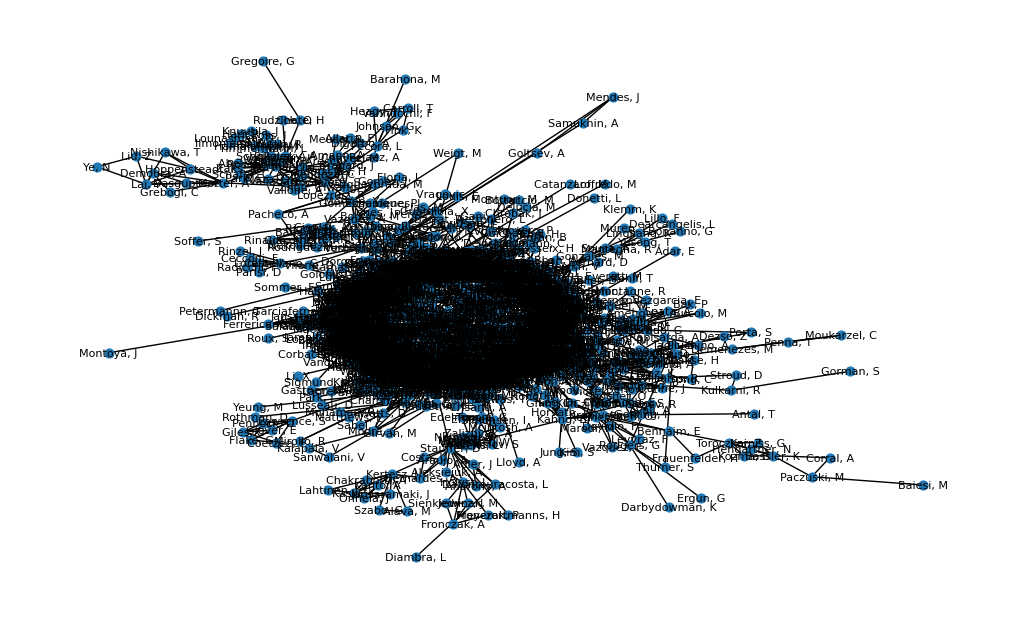

In [5]:
plt.figure(figsize = (10, 6), dpi = 100) 
nx.draw_kamada_kawai(G1, with_labels = True, node_size = 40, font_size = 8)

2. Calculate the degree sequence (list of degrees of each node) for the network. Plot the degree distribution using the histogram.

In [6]:
degrees = [G1.degree(author) for author in G1.nodes()]
print("Degree Sequence: ", degrees)

Degree Sequence:  [3, 4, 4, 4, 4, 4, 4, 1, 6, 3, 3, 7, 3, 3, 3, 2, 2, 2, 0, 2, 2, 2, 2, 5, 5, 0, 2, 2, 2, 10, 2, 2, 34, 27, 5, 5, 5, 5, 5, 5, 0, 1, 1, 2, 6, 12, 3, 6, 3, 3, 9, 4, 16, 21, 9, 8, 3, 2, 2, 2, 2, 19, 9, 7, 3, 2, 2, 2, 12, 3, 11, 10, 3, 3, 3, 6, 3, 27, 3, 3, 2, 4, 2, 2, 2, 2, 2, 4, 0, 1, 2, 2, 2, 9, 4, 15, 11, 4, 5, 4, 0, 2, 2, 2, 2, 3, 2, 1, 1, 0, 1, 1, 1, 3, 0, 1, 5, 3, 1, 1, 9, 2, 2, 2, 0, 6, 12, 5, 1, 1, 4, 10, 8, 8, 1, 7, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 4, 15, 14, 2, 3, 3, 3, 3, 2, 2, 0, 1, 1, 5, 1, 1, 1, 2, 1, 0, 2, 2, 3, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 1, 1, 4, 2, 6, 2, 2, 5, 4, 4, 3, 3, 10, 4, 4, 4, 4, 4, 2, 4, 4, 6, 0, 1, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 19, 5, 9, 18, 6, 6, 5, 2, 5, 6, 1, 2, 3, 3, 3, 3, 0, 2, 2, 3, 0, 1, 1, 6, 1, 1, 1, 5, 6, 3, 1, 4, 2, 2, 2, 4, 7, 0, 3, 3, 2, 0, 3, 3, 1, 1, 7, 9, 7, 11, 11, 7, 11, 7, 1, 1, 0, 2, 2, 5, 2, 8, 8, 6, 6, 17, 7, 8, 6, 6, 3, 2, 3, 2, 2, 2, 2, 9, 20, 0, 4, 1, 3, 3, 5, 12, 5, 7, 2, 5, 4, 9, 8, 7, 2, 1, 1, 2, 3, 2, 6, 3, 1, 2

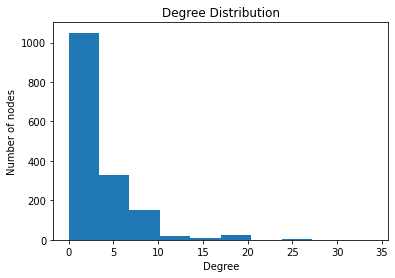

In [7]:
def printHistogram(data):
    plt.hist(data)
    plt.xlabel("Degree")
    plt.ylabel("Number of nodes")
    plt.title("Degree Distribution")
    plt.show()

printHistogram(degrees)

3. Given this degree sequence for G1, generate 10 random graphs that have the same degree sequence, number of nodes and numberof edges as G1.

In [8]:
graphList1 = []

for i in range(1, 11):
    G = nx.random_degree_sequence_graph(degrees, 10)
    graphList1.append(G)

print(graphList1)

[<networkx.classes.graph.Graph object at 0x7fec3a43da00>, <networkx.classes.graph.Graph object at 0x7fec39222940>, <networkx.classes.graph.Graph object at 0x7fec39222070>, <networkx.classes.graph.Graph object at 0x7fec3ab71460>, <networkx.classes.graph.Graph object at 0x7fec3a0b41f0>, <networkx.classes.graph.Graph object at 0x7fec39222130>, <networkx.classes.graph.Graph object at 0x7fec39222a30>, <networkx.classes.graph.Graph object at 0x7fec39222100>, <networkx.classes.graph.Graph object at 0x7fec3a700820>, <networkx.classes.graph.Graph object at 0x7fec3a0b42e0>]


4. Identify the community structures for Graph G1. Use the Louvain algorithm to calculate the best partition. You can use a Python implementation from Louvain Community Detection. Calculate the inter-community connection density matrix based on the communities found above. Plot the inter-community connection density matrix as a heatmap.

In [9]:
import networkx.algorithms.community as nx_comm

communities = nx_comm.louvain_communities(G1, seed = 123)
print("Number of communities:", len(communities))

print(communities)

Number of communities: 406
[{'Abramson, G', 'Kuperman, M', 'Zanette, D', 'Morelli, L'}, {'Bonilla, L', 'Acebron, J', 'Spigler, R', 'Ritort, F', 'Perezvicente, C'}, {'Tyler, J', 'Lukose, R', 'Puniyani, A', 'Wu, F', 'Huberman, B', 'Adar, E', 'Adamic, L', 'Wilkinson, D'}, {'Palm, G', 'Hehl, U', 'Diesmann, M', 'Kubo, M', 'Habib, M', 'Mehring, C', 'Gerstein, G', 'Aertsen, A'}, {'Rabinovich, M', 'Verichev, N', 'Afraimovich, V'}, {'Agrawal, H'}, {'Orlin, J', 'Ahuja, R', 'Magnanti, T'}, {'Chung, F', 'Vu, V', 'Dewey, T', 'Galas, D', 'Bhan, A', 'Lu, L', 'Aiello, W'}, {'Alba, R'}, {'Alberich, R', 'Rossello, F', 'Mirojulia, J'}, {'Lewis, J', 'Roberts, K', 'Bray, D', 'Alberts, B', 'Raff, M', 'Watson, J'}, {'Aldana, M'}, {'Aldous, D', 'Pittel, B'}, {'Zwick, U', 'Alon, N', 'Yuster, R'}, {'Alter, O', 'Brown, P', 'Botstein, D'}, {'Guichard, E', 'Vegaredondo, F', 'Guardiola, X', 'Moreira, A', 'Giralt, F', 'Cabrales, A', 'Perez, C', 'Herrmann, H', 'Gondran, B', 'Turtschi, A', 'Amaral, L', 'Louis, E', 'Li

In [10]:
n = len(communities)
denMat = []

for i in range(1, n + 1):
    denMat.append([0 for i in range(1, n + 1)])

for i in range(0, n):
    for j in range(0, n):
        edgeCnt = 0

        if (i < j):
            for node1 in communities[i]:
                for node2 in communities[j]: 
                    if G1.has_edge(node1, node2): 
                        edgeCnt = edgeCnt + 1

            density = edgeCnt / (len(communities[i]) * len(communities[j]))
            denMat[i][j] = density

print(denMat)

[[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

As the denseity matrix is zero, we can say that network is highly unconnected.This is very rare case. I have tested my code for the density matrix calculation on the other dataset, in which my code is working. Here is the results of testing on that dataset. 
[Density Matrix of US Airlines Network](https://github.com/JainamShah28/Social-Network-Analysis/blob/main/Test_Airlines_Data.ipynb)

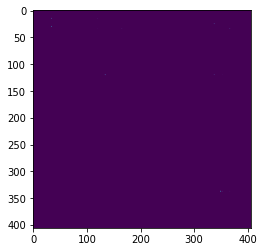

In [11]:
plt.imshow(denMat)
plt.show()

5. Now, you will be working with the Stochastic Block Model generator in NetworkX. This model has two main parameters, which are a list of community sizes, and a matrix that represents the inter-community connection density. You need to consider the communities obtained in part 4. Generate 10 graphs using the Stochastic Block Model graph generator in NetworkX.

In [12]:
from numpy.ma.core import transpose    

sizes = []
graphList2 = []

for community in communities:
    sizes.append(len(community))  

for i in range(1, 11):
    G = nx.stochastic_block_model(sizes, (denMat + transpose(denMat)) / 2)
    graphList2.append(G)

print(graphList2)

[<networkx.classes.graph.Graph object at 0x7fec650ebcd0>, <networkx.classes.graph.Graph object at 0x7fec3a3e8be0>, <networkx.classes.graph.Graph object at 0x7fec3a2c8340>, <networkx.classes.graph.Graph object at 0x7fec392221c0>, <networkx.classes.graph.Graph object at 0x7fec2b2f6b20>, <networkx.classes.graph.Graph object at 0x7fec2b2ec760>, <networkx.classes.graph.Graph object at 0x7fec39b83a30>, <networkx.classes.graph.Graph object at 0x7fec3a0b4fd0>, <networkx.classes.graph.Graph object at 0x7fec2b2f6820>, <networkx.classes.graph.Graph object at 0x7fec2b2ecf10>]


6. Calculate the following properties for each of these 10 graphs obtained in part 3 and part 5:

    i. Degree Distribution
    
    ii. Network diameter

    iii. Average Shortest Path Length

    iv. Average clustering coefficient
    
    v. Transitivity
    
    vi. Assortativity

**i. Degree Distribution**

(For Part-3 Graphs)

As these graphs are generated using the same degree sequence as G1, the degree distribution of all these graphs same as the degree distribution of G1.  

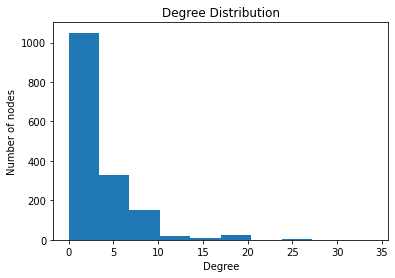

In [13]:
printHistogram([graphList1[0].degree(node) for node in graphList1[0].nodes()])

(For Part-5 Graphs)

As these graphs are generated using the same community sequence, the degree distribution of all these graph is same. 

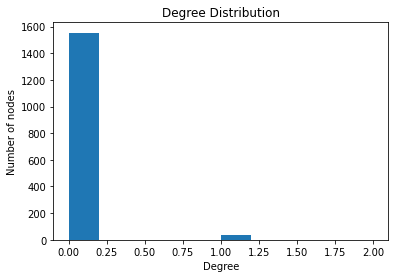

In [14]:
printHistogram([graphList2[2].degree(node) for node in graphList2[0].nodes()])

**ii. Network Diameter**

(For Part-3 Graphs)

In [15]:
for graph in graphList1:    
    try:    
        netDiameter = nx.diameter()
        print(netDiameter)
    except:
        print("Found infinite path length because the graph is not connected!")

Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!


(For Part-5 Graphs)

In [16]:
for graph in graphList2:    
    try:    
        netDiameter = nx.diameter()
        print(netDiameter)
    except:
        print("Found infinite path length because the graph is not connected!")

Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!
Found infinite path length because the graph is not connected!


As the network is highly unconnected, there is no path between first node and last node of the graph, which results into infinite path length. 

**iii. Average Shortest Path Length**

(For Part-3 Graphs)

In [17]:
for graph in graphList1:
    try:
        pathLen = nx.average_shortest_path_length(graph)
        print(pathLen)
    except:
        print("Graph is not connected")

Graph is not connected
Graph is not connected
Graph is not connected
Graph is not connected
Graph is not connected
Graph is not connected
Graph is not connected
Graph is not connected
Graph is not connected
Graph is not connected


(For Part-5 Graphs)

In [18]:
for graph in graphList2:
    try:
        pathLen = nx.average_shortest_path_length(graph)
        print(pathLen)
    except:
        print("Graph is not connected")

Graph is not connected
Graph is not connected
Graph is not connected
Graph is not connected
Graph is not connected
Graph is not connected
Graph is not connected
Graph is not connected
Graph is not connected
Graph is not connected


Since network is highly unconnected it is not possible to find Average Shortest Path Length. 

**iv. Average clustering coefficient**

(For Part-3 Graphs)

In [19]:
for graph in graphList1:
    avgClst = nx.average_clustering(graph)
    print(avgClst)

0.004967808731103985
0.004967808731103985
0.004967808731103985
0.004967808731103985
0.004967808731103985
0.004967808731103985
0.004967808731103985
0.004967808731103985
0.004967808731103985
0.004967808731103985


Since all graphs are generated using same degree sequence the avg clustering of all graphs is also same. 

(For Part-5 Graphs)

In [20]:
for graph in graphList2:
    avgClst = nx.average_clustering(graph)
    print(avgClst)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


The 0 value of average clustering coefficient states that, the nodes in network hardly have any connection with their nodes. 

**v. Transitivity**

(For Part-3 Graphs)

In [21]:
for graph in graphList1:
    trans = nx.transitivity(graph)
    print(trans)

0.0068165070007369195
0.0068165070007369195
0.0068165070007369195
0.0068165070007369195
0.0068165070007369195
0.0068165070007369195
0.0068165070007369195
0.0068165070007369195
0.0068165070007369195
0.0068165070007369195


Since all graphs are generated using same degree sequence the transitivity of all graphs is also same. 

(For Part-5 Graphs)

In [22]:
for graph in graphList2:
    trans = nx.transitivity(graph)
    print(trans)

0
0
0
0
0
0
0
0
0
0


Since the network is highly unconnected, there is no chance of connection of any node with its neighbour nodes i.e. transitivity is 0. 

**vi. Assortativity**

(For Part-3 Graphs)

In [23]:
for graph in graphList1:
    assort = nx.degree_assortativity_coefficient(graph)
    print(assort)

-0.03972346752875078
-0.03972346752875078
-0.03972346752875078
-0.03972346752875078
-0.03972346752875078
-0.03972346752875078
-0.03972346752875078
-0.03972346752875078
-0.03972346752875078
-0.03972346752875078


(For Part-5 Graphs)

In [24]:
for graph in graphList2:
    assort = nx.degree_assortativity_coefficient(graph)
    print(assort)

-0.11764705882352863
-0.16556291390728423
-0.058823529411765205
-0.1818181818181823
-0.03571428571428733
0.039999999999999
0.13207547169811393
-0.04761904761904855
-0.12000000000000244
-0.14285714285714163


7. Calculate the average values for Degree Sequence Random Graphs and Community Random Graphs for each property in the previous step. Additionally, calculate the same for graph G1. Compare the average values and the values for Graph G1. You need to conclude which of the randomly generated graph shows similarity with the actual graph generated from the dataset. Give appropriate reasoning for the same.

In [25]:
print("Average Degree for graph G1:", sum(degrees) / len(degrees))

Average Degree for graph G1: 3.4512271869100064


In [26]:
print("Average Degree for Degree Sequence Random Graphs:")

for graph in graphList1:    
    deg = [graph.degree(node) for node in graph.nodes()]
    print(sum(deg) / len(deg))

Average Degree for Degree Sequence Random Graphs:
3.4512271869100064
3.4512271869100064
3.4512271869100064
3.4512271869100064
3.4512271869100064
3.4512271869100064
3.4512271869100064
3.4512271869100064
3.4512271869100064
3.4512271869100064


In [27]:
print("Average Degree for Community Random Graphs:")

for graph in graphList2:    
    deg = [graph.degree(node) for node in graph.nodes()]
    print(sum(deg) / len(deg))

Average Degree for Community Random Graphs:
0.02391441157960982
0.027690371302706105
0.022655758338577723
0.032724984266834484
0.03650094398993078
0.03775959723096287
0.0289490245437382
0.027690371302706105
0.03524229074889868
0.03146633102580239


In [28]:
print("Average Clustering Coefficient of G1:", nx.average_clustering(G1))

Average Clustering Coefficient of G1: 0.6377905695067805


In [29]:
print("Average Clustering Coefficeint of Degree Sequence Random Graphs:")

for graph in graphList1:
    avgClst = nx.average_clustering(graph)
    print(avgClst)

Average Clustering Coefficeint of Degree Sequence Random Graphs:
0.004967808731103985
0.004967808731103985
0.004967808731103985
0.004967808731103985
0.004967808731103985
0.004967808731103985
0.004967808731103985
0.004967808731103985
0.004967808731103985
0.004967808731103985


In [30]:
print("Average Clustering Coefficient of Community Random Graphs:")

for graph in graphList2:
    avgClst = nx.average_clustering(graph)
    print(avgClst)

Average Clustering Coefficient of Community Random Graphs:
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


If the average degree and average clustering coefficient of two graphs are same then we can say that that two graphs are similar, and if any of the value is different then we can say that two graphs are dissimilar.  

*   Degree Sequence Random Graphs
    
      As the average clustering coefficient is different in both degree squence random graphs and G1, none of the graph is similar to G1 (i.e. all graphs are dissimilar) 


*   Community Random Graphs

      As the average degree and average clustering coefficient is different in both community random graphs and G1, none of the graph is similar to G1 (i.e. all graphs are dissimilar) 


